# **DATA PREPARATION**

In [1]:
import pandas as pd

# Load the Excel file
file_path = '/kaggle/input/mentidata/mentidata.xlsx'

# Load Sheet 6
df = pd.read_excel(file_path, sheet_name='Sheet 6 - forum', engine='openpyxl')
df.columns = ['PA', 'IVA', 'SA', 'SEA']
print(df.columns)
df = df.drop(index=0).reset_index(drop=True)
df.head()

Index(['PA', 'IVA', 'SA', 'SEA'], dtype='object')


,PA,IVA,SA,SEA
0,NaN,“My dad has been depressed fir as long as i ca...,NaN,"""It feels like his depression has skyrocketed ..."
1,NaN,NaN,NaN,"“It feels like everything I do is futile, and ..."
2,NaN,NaN,“My mum and dad have cut me off and it's been ...,“That part of my heart has been left empty and...
3,NaN,NaN,NaN,“now I feel more depressed than ever feel alon...
4,“I have also gained so much weight in the last...,NaN,“I have no social interactions as I feel unwor...,“I have no motivation I am crying all the time...


In [2]:
data = []

import re  # Importing the regular expressions module
# Iterate over each row
for index, row in df.iterrows(): 
    for category in df.columns:
        text_data = row[category]
        if pd.notna(text_data) and text_data != '':
            text_data = text_data.replace('“', '"').replace('”', '"')
            # Split the text data by double quotes and strip whitespace
            texts = [text.strip() for text in text_data.split('"') if text.strip()]
#             texts = [text.strip() for text in re.split(r'["\”]', text_data) if text.strip()]
            for text in texts: 
                data.append([text, category])  # Append each text and its category


# Create a new DataFrame
new_df = pd.DataFrame(data, columns=['Text', 'Category'])

# Display the new DataFrame
import IPython.display as display
display.display(new_df)

,Text,Category
0,My dad has been depressed fir as long as i can...,IVA
1,It feels like his depression has skyrocketed t...,SEA
2,he is 60 years old but im only 19 and have my ...,SEA
3,ive been having nightmares and i really just d...,SEA
4,"It feels like everything I do is futile, and a...",SEA
...,...,...
1593,I feel guilty for my depression,SEA
1594,Life was great. until about 4 weeks ago the lo...,SA
1595,I’m already in so much pain I don’t know if my...,SEA
1596,I’ve been doing a lot of trauma recovery work ...,PA


In [3]:
category_map = {'PA': 0, 'IVA': 1, 'SA': 2, 'SEA': 3}
new_df['Category'] = new_df['Category'].map(category_map)

# Check the unique values in the category column
print(new_df['Category'].unique())

[1 3 2 0]


In [4]:
new_df

,Text,Category
0,My dad has been depressed fir as long as i can...,1
1,It feels like his depression has skyrocketed t...,3
2,he is 60 years old but im only 19 and have my ...,3
3,ive been having nightmares and i really just d...,3
4,"It feels like everything I do is futile, and a...",3
...,...,...
1593,I feel guilty for my depression,3
1594,Life was great. until about 4 weeks ago the lo...,2
1595,I’m already in so much pain I don’t know if my...,3
1596,I’ve been doing a lot of trauma recovery work ...,0


In [5]:
from sklearn.utils import resample

# Drop any rows with missing values
new_df = new_df.dropna()

In [6]:
# Separate each class into a different DataFrame
df_sea = new_df[new_df['Category'] == 3]
df_sa = new_df[new_df['Category'] == 2]
df_pa = new_df[new_df['Category'] == 0]
df_iva = new_df[new_df['Category'] == 1]

In [7]:
df_sa.shape

(398, 2)

In [8]:
# Define the target number of samples (equal to the largest category, SEA, with 699 samples)
target_samples = 180

# Downsample each class to match the target sample count
df_sea_sample = resample(df_sea, replace=True, n_samples=target_samples, random_state=42)
df_sa_sample = resample(df_sa, replace=True, n_samples=target_samples, random_state=42)
df_pa_sample = resample(df_pa, replace=True, n_samples=target_samples, random_state=42)
df_iva_sample = df_iva

In [9]:
df = pd.concat([df_sea, df_sa, df_pa, df_iva])

In [10]:
from IPython.display import display, HTML
# Set display option to show all columns
pd.set_option('display.max_columns', None)  # None means display all columns

# Display the DataFrame in table form
# display(HTML(df.to_html(index=False)))

In [11]:
df.shape

(1598, 2)

In [12]:
# Shuffle the dataset
shuffled_df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Rename columns if necessary
shuffled_df.columns = ['text', 'labels']

In [13]:
# Split into train, validation, and test sets (e.g., 70% train, 15% validation, 15% test)
train_frac = 0.7
valid_frac = 0.15
test_frac = 0.15

train_size = int(train_frac * len(shuffled_df))
valid_size = int(valid_frac * len(shuffled_df))

train_df = shuffled_df[:train_size]
valid_df = shuffled_df[train_size:train_size + valid_size]
test_df = shuffled_df[train_size + valid_size:]

In [14]:
# Convert to Hugging Face Dataset format
from datasets import Dataset, DatasetDict

train_ds = Dataset.from_pandas(train_df)
valid_ds = Dataset.from_pandas(valid_df)
test_ds = Dataset.from_pandas(test_df)

# Combine into a DatasetDict
dataset_dict = DatasetDict({
    'train': train_ds,
    'validation': valid_ds,
    'test': test_ds
})

# Your balanced dataset is now ready in Hugging Face format
print(dataset_dict)


DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 1118
    })
    validation: Dataset({
        features: ['text', 'labels'],
        num_rows: 239
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 241
    })
})


In [15]:
!pip install datasets
!pip install huggingface hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 12.0 MB/s eta 0:00:0000:0100:01


In [18]:
from huggingface_hub import login
login()

In [17]:
# push data to hub
dataset_dict.push_to_hub("hebashakeel/Bert-classification-wellness")

HfHubHTTPError: 401 Client Error: Unauthorized for url: https://huggingface.co/api/repos/create (Request ID: Root=1-674dbfe0-3d57582a336d03af2f161fd8;dda3b2c9-8e00-4688-b4bc-45919a183fa1)

Invalid username or password.

# **MODEL TRAINING**

In [19]:
pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [20]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer

import evaluate
import numpy as np
from transformers import DataCollatorWithPadding

In [21]:
from datasets import load_dataset

dataset_dict = load_dataset("hebashakeel/Bert-classification-wellness")

README.md:   0%|          | 0.00/515 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/93.2k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/21.8k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/21.7k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1118 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/239 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/241 [00:00<?, ? examples/s]

In [22]:
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 1118
    })
    validation: Dataset({
        features: ['text', 'labels'],
        num_rows: 239
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 241
    })
})

**TRAIN TEACHER MODEL**

In [23]:
# Load model directly
model_path = "google-bert/bert-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(model_path)

id2label = {0: "PA", 1: "IVA", 2: "SA", 3: "SEA"}
label2id = {"PA": 0, "IVA": 1, "SA": 2, "SEA": 3}
model = AutoModelForSequenceClassification.from_pretrained(model_path, 
                                                           num_labels=4, 
                                                           id2label=id2label, 
                                                           label2id=label2id,)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Freezing the base model**

In [24]:
# print layers
for name, param in model.named_parameters():
   print(name, param.requires_grad)

bert.embeddings.word_embeddings.weight True
bert.embeddings.position_embeddings.weight True
bert.embeddings.token_type_embeddings.weight True
bert.embeddings.LayerNorm.weight True
bert.embeddings.LayerNorm.bias True
bert.encoder.layer.0.attention.self.query.weight True
bert.encoder.layer.0.attention.self.query.bias True
bert.encoder.layer.0.attention.self.key.weight True
bert.encoder.layer.0.attention.self.key.bias True
bert.encoder.layer.0.attention.self.value.weight True
bert.encoder.layer.0.attention.self.value.bias True
bert.encoder.layer.0.attention.output.dense.weight True
bert.encoder.layer.0.attention.output.dense.bias True
bert.encoder.layer.0.attention.output.LayerNorm.weight True
bert.encoder.layer.0.attention.output.LayerNorm.bias True
bert.encoder.layer.0.intermediate.dense.weight True
bert.encoder.layer.0.intermediate.dense.bias True
bert.encoder.layer.0.output.dense.weight True
bert.encoder.layer.0.output.dense.bias True
bert.encoder.layer.0.output.LayerNorm.weight True


In [25]:
# freeze base model parameters
for name, param in model.base_model.named_parameters():
    param.requires_grad = False

# unfreeze base model pooling layers
for name, param in model.base_model.named_parameters():
    if "pooler" in name:
        param.requires_grad = True

In [26]:
# print layers
for name, param in model.named_parameters():
   print(name, param.requires_grad)

bert.embeddings.word_embeddings.weight False
bert.embeddings.position_embeddings.weight False
bert.embeddings.token_type_embeddings.weight False
bert.embeddings.LayerNorm.weight False
bert.embeddings.LayerNorm.bias False
bert.encoder.layer.0.attention.self.query.weight False
bert.encoder.layer.0.attention.self.query.bias False
bert.encoder.layer.0.attention.self.key.weight False
bert.encoder.layer.0.attention.self.key.bias False
bert.encoder.layer.0.attention.self.value.weight False
bert.encoder.layer.0.attention.self.value.bias False
bert.encoder.layer.0.attention.output.dense.weight False
bert.encoder.layer.0.attention.output.dense.bias False
bert.encoder.layer.0.attention.output.LayerNorm.weight False
bert.encoder.layer.0.attention.output.LayerNorm.bias False
bert.encoder.layer.0.intermediate.dense.weight False
bert.encoder.layer.0.intermediate.dense.bias False
bert.encoder.layer.0.output.dense.weight False
bert.encoder.layer.0.output.dense.bias False
bert.encoder.layer.0.output.Lay

In [27]:
# define text preprocessing
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

In [28]:
# tokenize all datasetse
tokenized_data = dataset_dict.map(preprocess_function, batched=True)

Map:   0%|          | 0/1118 [00:00<?, ? examples/s]

Map:   0%|          | 0/239 [00:00<?, ? examples/s]

Map:   0%|          | 0/241 [00:00<?, ? examples/s]

In [29]:
# create data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

**EVALUATION**

In [30]:
# load metrics
accuracy = evaluate.load("accuracy")
auc_score = evaluate.load("roc_auc")
precision_score = evaluate.load("precision")
recall_score = evaluate.load("recall")

def compute_metrics(eval_pred):
    # get predictions
    predictions, labels = eval_pred
    
    # apply softmax to get probabilities
    probabilities = np.exp(predictions) / np.exp(predictions).sum(-1, keepdims=True)
    
    # compute AUC for each class in a one-vs-rest fashion
    aucs = []
    for class_idx in range(4): 
        # treat the current class as the "positive" class
        binary_labels = (labels == class_idx).astype(int)
        # use the probability of the current class for AUC calculation
        auc = auc_score.compute(prediction_scores=probabilities[:, class_idx], references=binary_labels)['roc_auc']
        aucs.append(auc)
    # average AUC over all classes
    avg_auc = np.round(np.mean(aucs), 3)
    
    # predict most probable class
    predicted_classes = np.argmax(predictions, axis=1)
    # compute accuracy
    acc = np.round(accuracy.compute(predictions=predicted_classes, references=labels)['accuracy'], 3)
    
    # Compute class-wise precision and recall
    class_precision = {}
    class_recall = {}
    
    for class_idx in range(4):
        tp = np.sum((predicted_classes == class_idx) & (labels == class_idx))  # True Positives
        fp = np.sum((predicted_classes == class_idx) & (labels != class_idx))  # False Positives
        fn = np.sum((predicted_classes != class_idx) & (labels == class_idx))  # False Negatives
        
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        
        class_precision[f"Precision_Class_{class_idx}"] = np.round(precision, 3)
        class_recall[f"Recall_Class_{class_idx}"] = np.round(recall, 3)
    
    return {
        "Accuracy": acc, 
        "AUC": avg_auc,
        **class_precision,
        **class_recall
    }

**TRAIN MODEL**

In [31]:
# hyperparameters
lr = 2e-4
batch_size = 8
num_epochs = 10

training_args = TrainingArguments(
    output_dir="bert-wellness-classifier",
    learning_rate=lr,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    logging_strategy="epoch",
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

In [32]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_data["train"],
    eval_dataset=tokenized_data["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
) 

trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,Accuracy,Auc,Precision Class 0,Precision Class 1,Precision Class 2,Precision Class 3,Recall Class 0,Recall Class 1,Recall Class 2,Recall Class 3
1,1.192700,1.072821,0.548000,0.811000,0.659000,1.000000,0.591000,0.506000,0.509000,0.148000,0.206000,0.898000
2,1.014200,0.975591,0.539000,0.845000,0.759000,0.889000,0.619000,0.478000,0.415000,0.296000,0.206000,0.888000
3,0.916300,0.862300,0.618000,0.868000,0.714000,0.857000,0.571000,0.588000,0.660000,0.222000,0.444000,0.816000
4,0.841400,0.833701,0.606000,0.875000,0.756000,0.818000,0.556000,0.562000,0.585000,0.333000,0.397000,0.827000
5,0.791300,0.816962,0.643000,0.882000,0.773000,0.737000,0.719000,0.575000,0.642000,0.519000,0.365000,0.857000
6,0.771100,0.783803,0.680000,0.886000,0.776000,0.824000,0.688000,0.622000,0.717000,0.519000,0.524000,0.806000
7,0.746000,0.786004,0.676000,0.887000,0.791000,0.833000,0.711000,0.607000,0.642000,0.556000,0.508000,0.837000
8,0.724200,0.774416,0.680000,0.888000,0.750000,0.750000,0.763000,0.618000,0.736000,0.556000,0.460000,0.827000
9,0.718900,0.777447,0.689000,0.889000,0.818000,0.833000,0.721000,0.618000,0.679000,0.556000,0.492000,0.857000
10,0.715900,0.773614,0.701000,0.889000,0.837000,0.833000,0.739000,0.627000,0.679000,0.556000,0.540000,0.857000


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0

TrainOutput(global_step=700, training_loss=0.8432125854492187, metrics={'train_runtime': 151.3468, 'train_samples_per_second': 73.87, 'train_steps_per_second': 4.625, 'total_flos': 381647383437216.0, 'train_loss': 0.8432125854492187, 'epoch': 10.0})

In [35]:
from transformers import Trainer

# Assuming `trainer` is your Trainer instance and `test_dataset` is your test dataset
test_results = trainer.evaluate(tokenized_data["test"])

# Print the results
print("Test Results on the Best Model:")
for key, value in test_results.items():
    print(f"{key}: {value}")

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Test Results on the Best Model:
eval_loss: 0.7736139297485352
eval_Accuracy: 0.701
eval_AUC: 0.889
eval_Precision_Class_0: 0.837
eval_Precision_Class_1: 0.833
eval_Precision_Class_2: 0.739
eval_Precision_Class_3: 0.627
eval_Recall_Class_0: 0.679
eval_Recall_Class_1: 0.556
eval_Recall_Class_2: 0.54
eval_Recall_Class_3: 0.857
eval_runtime: 1.1061
eval_samples_per_second: 217.878
eval_steps_per_second: 14.465
epoch: 10.0


In [36]:
# apply model to validation dataset
predictions = trainer.predict(tokenized_data["validation"])

# Extract the logits and labels from the predictions object
logits = predictions.predictions
labels = predictions.label_ids

# Use your compute_metrics function
metrics = compute_metrics((logits, labels))
print(metrics)

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'Accuracy': 0.561, 'AUC': 0.836, 'Precision_Class_0': 0.697, 'Precision_Class_1': 0.733, 'Precision_Class_2': 0.6, 'Precision_Class_3': 0.5, 'Recall_Class_0': 0.451, 'Recall_Class_1': 0.355, 'Recall_Class_2': 0.443, 'Recall_Class_3': 0.76}


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


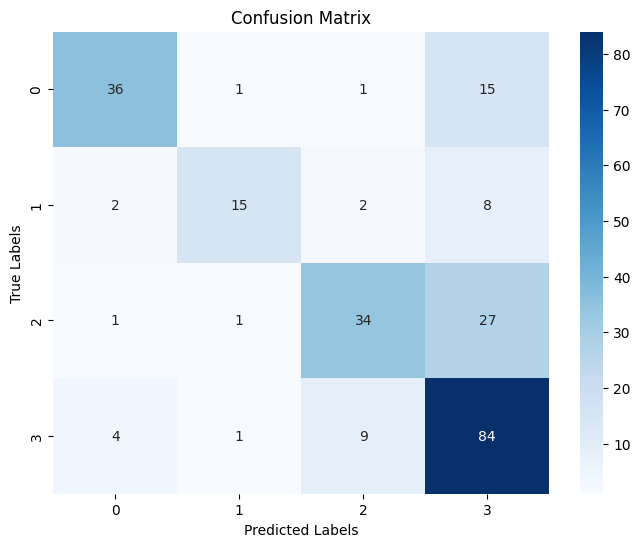

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.84      0.68      0.75        53
     Class 1       0.83      0.56      0.67        27
     Class 2       0.74      0.54      0.62        63
     Class 3       0.63      0.86      0.72        98

    accuracy                           0.70       241
   macro avg       0.76      0.66      0.69       241
weighted avg       0.73      0.70      0.70       241



In [37]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

predictions = trainer.predict(tokenized_data["test"])

predicted_classes = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids

conf_matrix = confusion_matrix(true_labels, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(4), yticklabels=range(4))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Step 3: Print classification report
class_report = classification_report(true_labels, predicted_classes, target_names=[f"Class {i}" for i in range(4)])
print("Classification Report:\n", class_report)

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


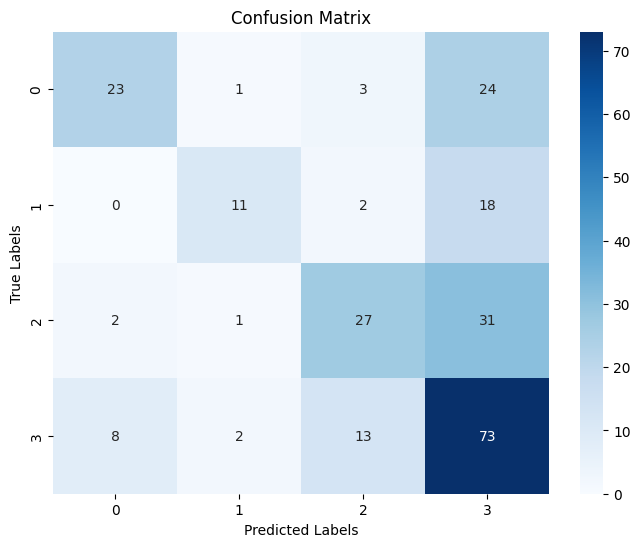

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.70      0.45      0.55        51
     Class 1       0.73      0.35      0.48        31
     Class 2       0.60      0.44      0.51        61
     Class 3       0.50      0.76      0.60        96

    accuracy                           0.56       239
   macro avg       0.63      0.50      0.53       239
weighted avg       0.60      0.56      0.55       239



In [38]:
predictions = trainer.predict(tokenized_data["validation"])

predicted_classes = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids

conf_matrix = confusion_matrix(true_labels, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(4), yticklabels=range(4))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

class_report = classification_report(true_labels, predicted_classes, target_names=[f"Class {i}" for i in range(4)])
print("Classification Report:\n", class_report)

In [33]:
# apply model to validation dataset
predictions = trainer.predict(tokenized_data["validation"])

# Extract the logits and labels from the predictions object
logits = predictions.predictions
labels = predictions.label_ids

# Use your compute_metrics function
metrics = compute_metrics((logits, labels))
print(metrics)

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'Accuracy': 0.561, 'AUC': 0.836, 'Precision_Class_0': 0.697, 'Precision_Class_1': 0.733, 'Precision_Class_2': 0.6, 'Precision_Class_3': 0.5, 'Recall_Class_0': 0.451, 'Recall_Class_1': 0.355, 'Recall_Class_2': 0.443, 'Recall_Class_3': 0.76}


In [34]:
# push model to hub
trainer.push_to_hub()

HfHubHTTPError: 401 Client Error: Unauthorized for url: https://huggingface.co/api/repos/create (Request ID: Root=1-674dc0c9-6ce5c517215a3bb407ee068e;0dd91c88-d2db-4403-aac9-cc67705e39f5)

Invalid username or password.